# 1. Understand the dataset:

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
df = pd.read_csv(r"Datasets\311_Service_Requests_from_2010_to_Present.csv")

C:\Users\NTStudy\AppData\Local\Temp\ipykernel_24096\3569084056.py:1: DtypeWarning: Columns (48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"Datasets\311_Service_Requests_from_2010_to_Present.csv")


In [64]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [65]:
df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [66]:
df.shape

(364558, 53)

In [67]:
df.isnull().sum(axis=0)

Unique Key                             0
Created Date                           0
Closed Date                         2381
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          6501
Location Type                        133
Incident Zip                        2998
Incident Address                   51699
Street Name                        51699
Cross Street 1                     57188
Cross Street 2                     57805
Intersection Street 1             313438
Intersection Street 2             314046
Address Type                        3252
City                                2997
Landmark                          364183
Facility Type                       2389
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2402
Community Board                        0
Borough         

In [68]:
columns_with_nulls_values = df.columns[df.isnull().any()].tolist()
columns_with_nulls_values

['Closed Date',
 'Descriptor',
 'Location Type',
 'Incident Zip',
 'Incident Address',
 'Street Name',
 'Cross Street 1',
 'Cross Street 2',
 'Intersection Street 1',
 'Intersection Street 2',
 'Address Type',
 'City',
 'Landmark',
 'Facility Type',
 'Due Date',
 'Resolution Action Updated Date',
 'X Coordinate (State Plane)',
 'Y Coordinate (State Plane)',
 'School Region',
 'School Code',
 'School Zip',
 'School or Citywide Complaint',
 'Vehicle Type',
 'Taxi Company Borough',
 'Taxi Pick Up Location',
 'Bridge Highway Name',
 'Bridge Highway Direction',
 'Road Ramp',
 'Bridge Highway Segment',
 'Garage Lot Name',
 'Ferry Direction',
 'Ferry Terminal Name',
 'Latitude',
 'Longitude',
 'Location']

# 2. Data exploratory analysis:

In [69]:
from sklearn.feature_extraction import FeatureHasher

In [70]:
str(columns_with_nulls_values)

"['Closed Date', 'Descriptor', 'Location Type', 'Incident Zip', 'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2', 'Intersection Street 1', 'Intersection Street 2', 'Address Type', 'City', 'Landmark', 'Facility Type', 'Due Date', 'Resolution Action Updated Date', 'X Coordinate (State Plane)', 'Y Coordinate (State Plane)', 'School Region', 'School Code', 'School Zip', 'School or Citywide Complaint', 'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location', 'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment', 'Garage Lot Name', 'Ferry Direction', 'Ferry Terminal Name', 'Latitude', 'Longitude', 'Location']"

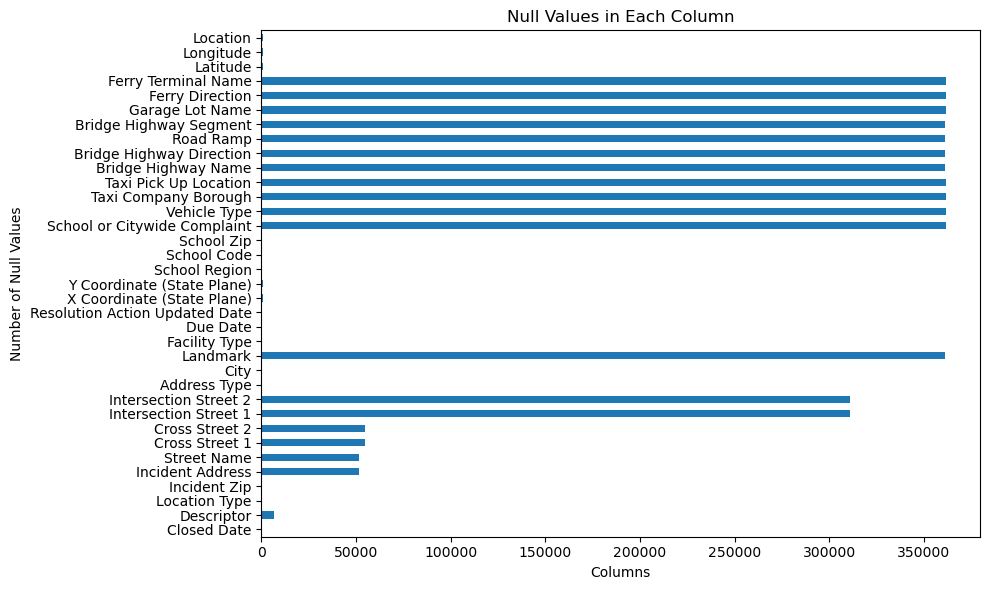

In [94]:
null_counts = df[columns_with_nulls_values].isnull().sum()
plt.figure(figsize=(10, 6))  # Increase the figure size

null_counts.plot(kind='barh')

plt.xlabel('Columns')
plt.ylabel('Number of Null Values')
plt.title('Null Values in Each Column')
plt.tight_layout()  # Adjust layout to prevent label overlap
plt.show()

## Missing value treatment

In [72]:
percentage_of_missing_values = (df['Closed Date'].isna().sum(axis=0)/df.shape[0])*100
percentage_of_missing_values

0.6531196682009447

In [73]:
df.dropna(subset=['Closed Date'], inplace=True)

In [74]:
df.isnull().sum()

Unique Key                             0
Created Date                           0
Closed Date                            0
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          6496
Location Type                        130
Incident Zip                         675
Incident Address                   51686
Street Name                        51686
Cross Street 1                     55331
Cross Street 2                     55464
Intersection Street 1             311549
Intersection Street 2             311673
Address Type                         929
City                                 674
Landmark                          361802
Facility Type                         18
Status                                 0
Due Date                               1
Resolution Description                 0
Resolution Action Updated Date        39
Community Board                        0
Borough         

## Analyze the date column,and remove entries that have an incorrect timeline

In [75]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [76]:
# Convert the date columns to datetime data type
df["Created Date"] = pd.to_datetime(df["Created Date"])
df["Closed Date"] = pd.to_datetime(df["Closed Date"])

# Calculate the time difference for each row
df["Time Elapsed"] = df["Closed Date"] - df["Created Date"]

# Convert the time difference to seconds
df["Time Elapsed"] = df["Time Elapsed"].dt.total_seconds()

# Print the first 5 values of the "Time Elapsed" column
print(df["Time Elapsed"].head(5))

0     3330.0
1     5233.0
2    17494.0
3    27927.0
4    12464.0
Name: Time Elapsed, dtype: float64


In [77]:
df["Time Elapsed"].describe()

count    3.621770e+05
mean     1.511330e+04
std      2.110255e+04
min      6.100000e+01
25%      4.533000e+03
50%      9.616000e+03
75%      1.887800e+04
max      2.134342e+06
Name: Time Elapsed, dtype: float64

In [78]:
df[["Complaint Type", "City"]].isnull().sum()

Complaint Type      0
City              674
dtype: int64

In [79]:
# Impute null values in "City" column with a specific value, such as "Unknown"
df["City"] = df["City"].fillna("Unknown City")

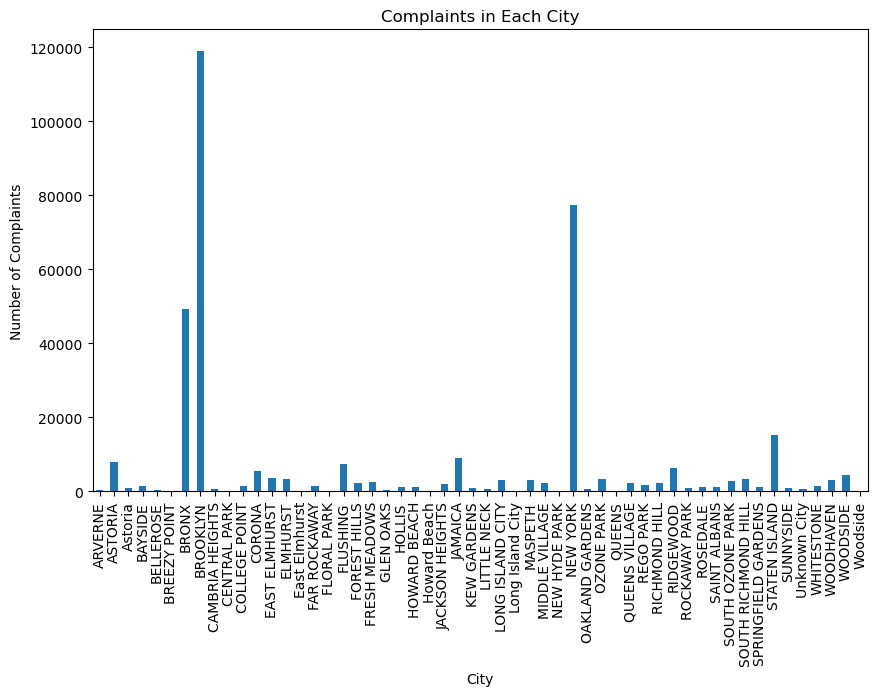

In [80]:
# Group the DataFrame by "City" and count the number of occurrences of each complaint
complaints_by_city = df.groupby("City")["Complaint Type"].count()

plt.figure(figsize=(10, 6))  # Increase the figure size

# Plot the frequency of complaints in each city
complaints_by_city.plot(kind="bar")

plt.xlabel("City")
plt.ylabel("Number of Complaints")
plt.title("Complaints in Each City")
plt.show()

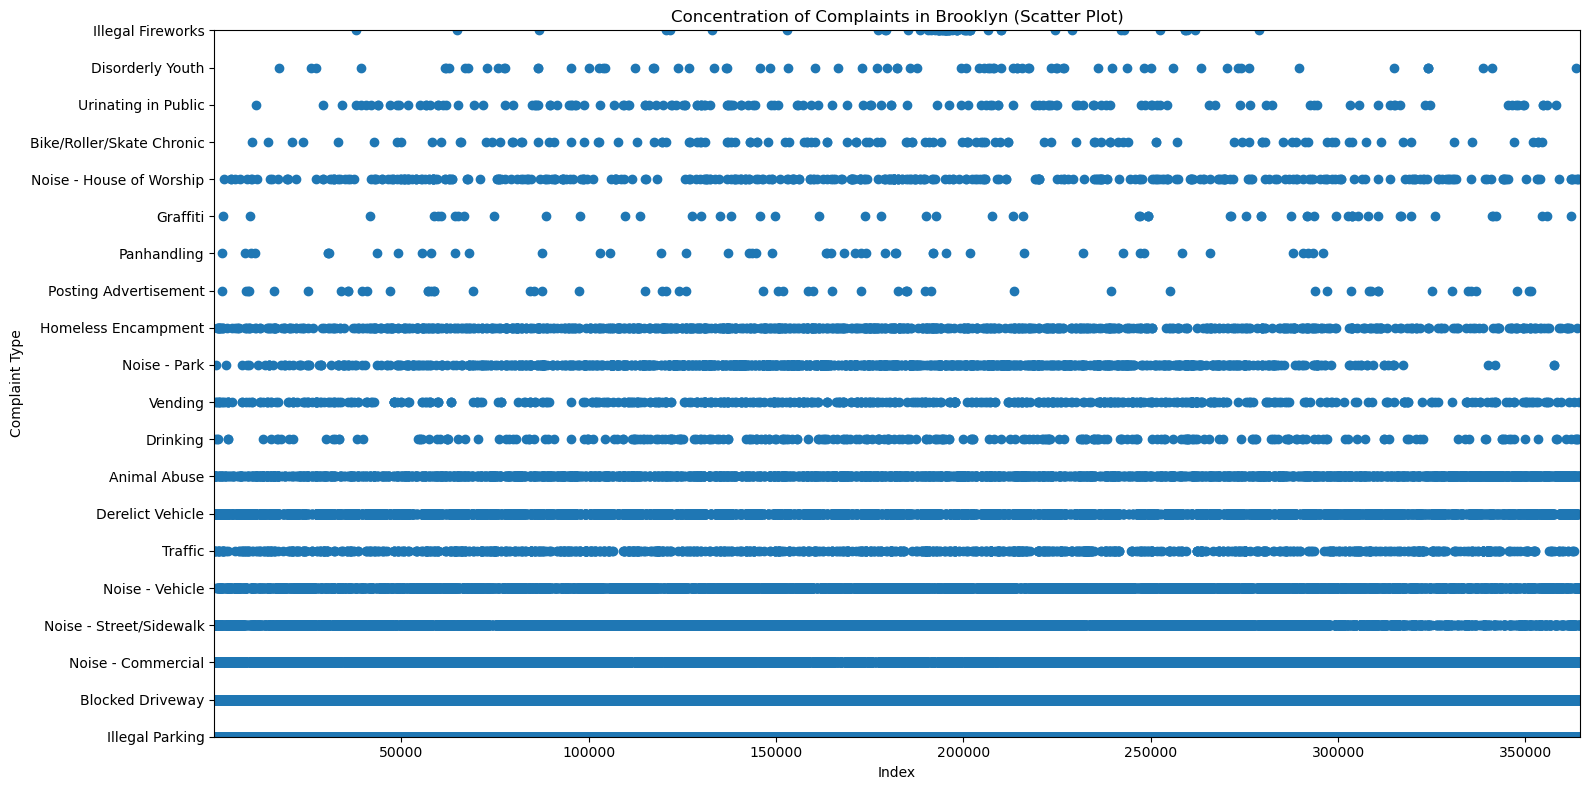

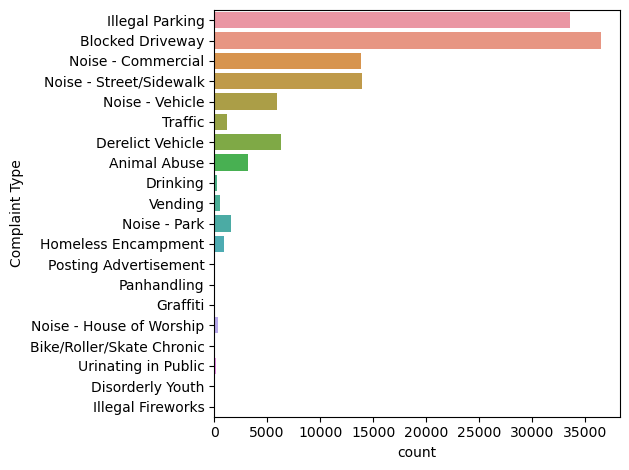

In [81]:
# Filter the DataFrame to include only complaints in Brooklyn
brooklyn_complaints = df[df["City"] == "BROOKLYN"]
fig, ax = plt.subplots(figsize=(16,8))

# Create a scatter plot of the concentration of complaints in Brooklyn
ax.scatter(brooklyn_complaints.index, brooklyn_complaints["Complaint Type"])

ax.set_xlabel("Index")
ax.set_ylabel("Complaint Type")
ax.set_title("Concentration of Complaints in Brooklyn (Scatter Plot)")

ax.autoscale(enable=True, axis='both', tight=True)

plt.tight_layout()
plt.show()

# Create a count plot of the concentration of complaints in Brooklyn
sns.countplot(data=brooklyn_complaints, y="Complaint Type")

ax.set_xlabel("Count")
ax.set_ylabel("Complaint Type")
ax.set_title("Frequency of Complaint Types in Brooklyn")
plt.tight_layout()
plt.show()

# 3. Find major types of complaints:

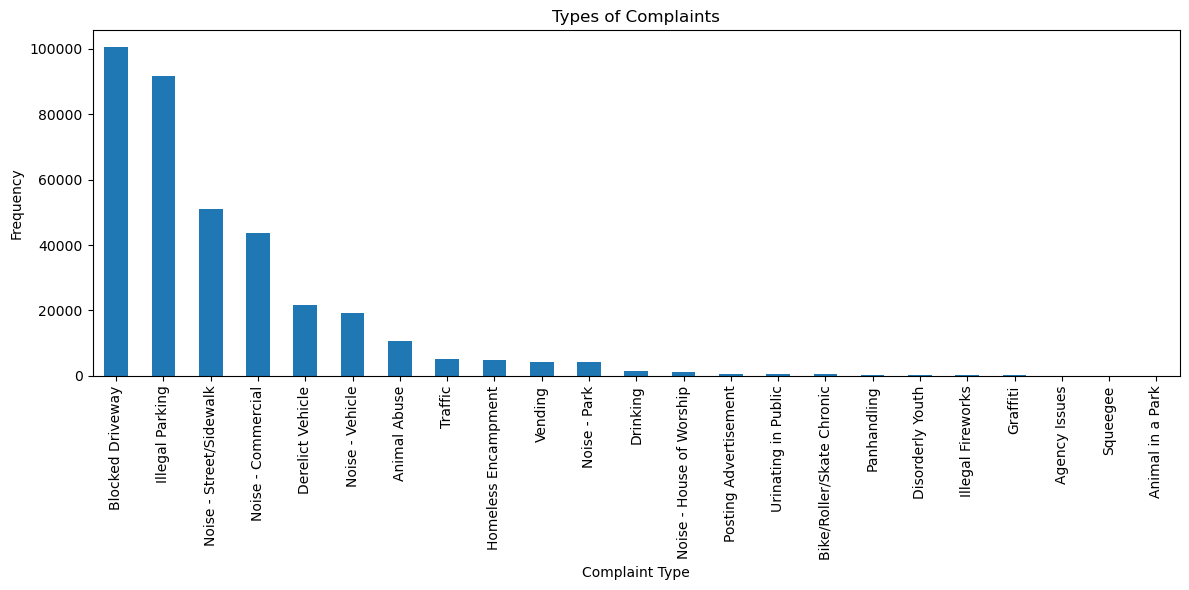

In [82]:
complaint_counts = df["Complaint Type"].value_counts()

# Plot the bar graph
plt.figure(figsize=(12, 6))
complaint_counts.plot(kind="bar")
plt.xlabel("Complaint Type")
plt.ylabel("Frequency")
plt.title("Types of Complaints")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

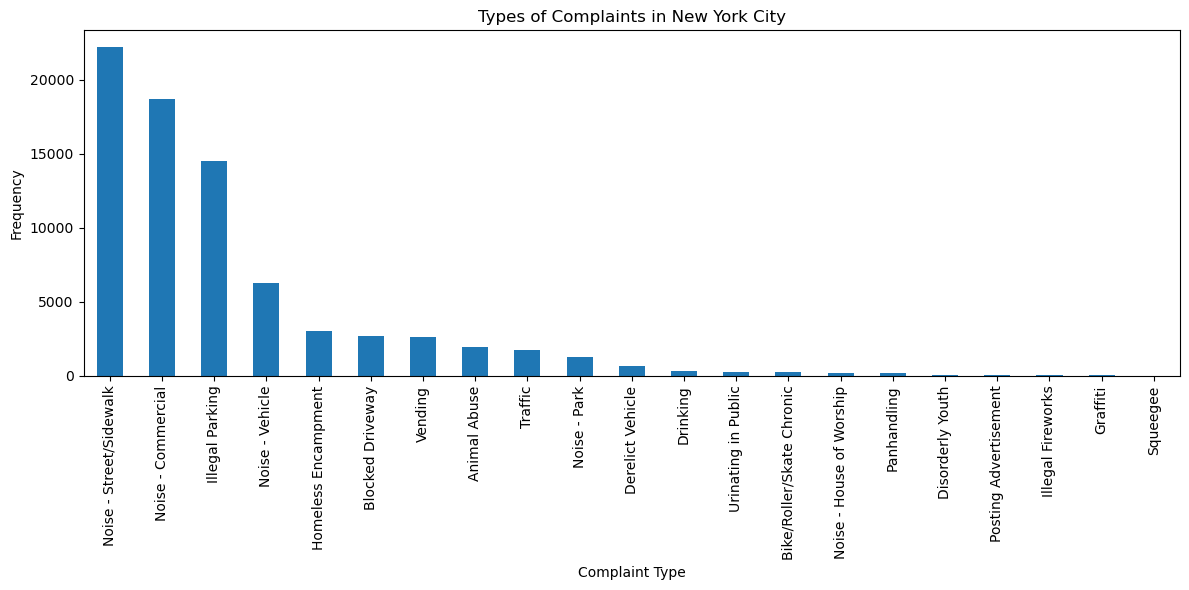

In [83]:
nyc_complaints = df[df["City"] == "NEW YORK"]

# Check if the filtered DataFrame is empty
if nyc_complaints.empty:
    print("No complaints found in New York City")
else:
    # Calculate the frequency of each complaint type
    complaint_counts = nyc_complaints["Complaint Type"].value_counts()

    # Plot the bar graph
    plt.figure(figsize=(12, 6))
    complaint_counts.plot(kind="bar")
    plt.xlabel("Complaint Type")
    plt.ylabel("Frequency")
    plt.title("Types of Complaints in New York City")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

In [84]:
top_10_complaints = complaint_counts.head(10)
top_10_complaints

Noise - Street/Sidewalk    22245
Noise - Commercial         18686
Illegal Parking            14549
Noise - Vehicle             6294
Homeless Encampment         3060
Blocked Driveway            2705
Vending                     2638
Animal Abuse                1941
Traffic                     1769
Noise - Park                1243
Name: Complaint Type, dtype: int64

In [85]:
# Group the DataFrame by "City" and calculate the frequency of each complaint type
complaints_by_city = df.groupby("City")["Complaint Type"].value_counts()
complaints_by_city

City      Complaint Type         
ARVERNE   Illegal Parking             62
          Blocked Driveway            50
          Animal Abuse                46
          Derelict Vehicle            32
          Noise - Street/Sidewalk     29
                                    ... 
Woodside  Illegal Parking            124
          Blocked Driveway            27
          Derelict Vehicle             8
          Noise - Street/Sidewalk      5
          Noise - Commercial           2
Name: Complaint Type, Length: 792, dtype: int64

In [86]:
# Create the pivot table
df_new = df.pivot_table(index="Complaint Type", columns="City", aggfunc='size', fill_value=0)
df_new

City,ARVERNE,ASTORIA,Astoria,BAYSIDE,BELLEROSE,BREEZY POINT,BRONX,BROOKLYN,CAMBRIA HEIGHTS,CENTRAL PARK,...,SOUTH OZONE PARK,SOUTH RICHMOND HILL,SPRINGFIELD GARDENS,STATEN ISLAND,SUNNYSIDE,Unknown City,WHITESTONE,WOODHAVEN,WOODSIDE,Woodside
Complaint Type,,,,,,,,,,,,,,,,,,,,,
Agency Issues,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,8,0,0,0,0
Animal Abuse,46,170,0,53,15,2,1971,3191,15,0,...,74,40,42,786,40,1,43,57,111,0
Animal in a Park,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bike/Roller/Skate Chronic,0,16,0,0,1,0,22,124,0,0,...,1,1,0,10,2,2,4,2,5,0
Blocked Driveway,50,3436,159,514,138,3,17062,36445,177,0,...,1202,1946,330,2845,278,86,279,1363,2038,27
Derelict Vehicle,32,426,14,231,120,3,2402,6257,148,0,...,425,356,267,2184,17,63,279,369,298,8
Disorderly Youth,2,5,0,2,2,0,66,79,0,0,...,2,2,0,25,2,0,1,0,1,0
Drinking,1,43,0,1,1,1,206,291,0,0,...,14,25,6,188,12,3,3,4,15,0
Graffiti,1,4,0,3,0,0,15,60,0,0,...,2,0,0,6,1,0,1,0,4,0


# 4. Visualize the major types of complaints in each city

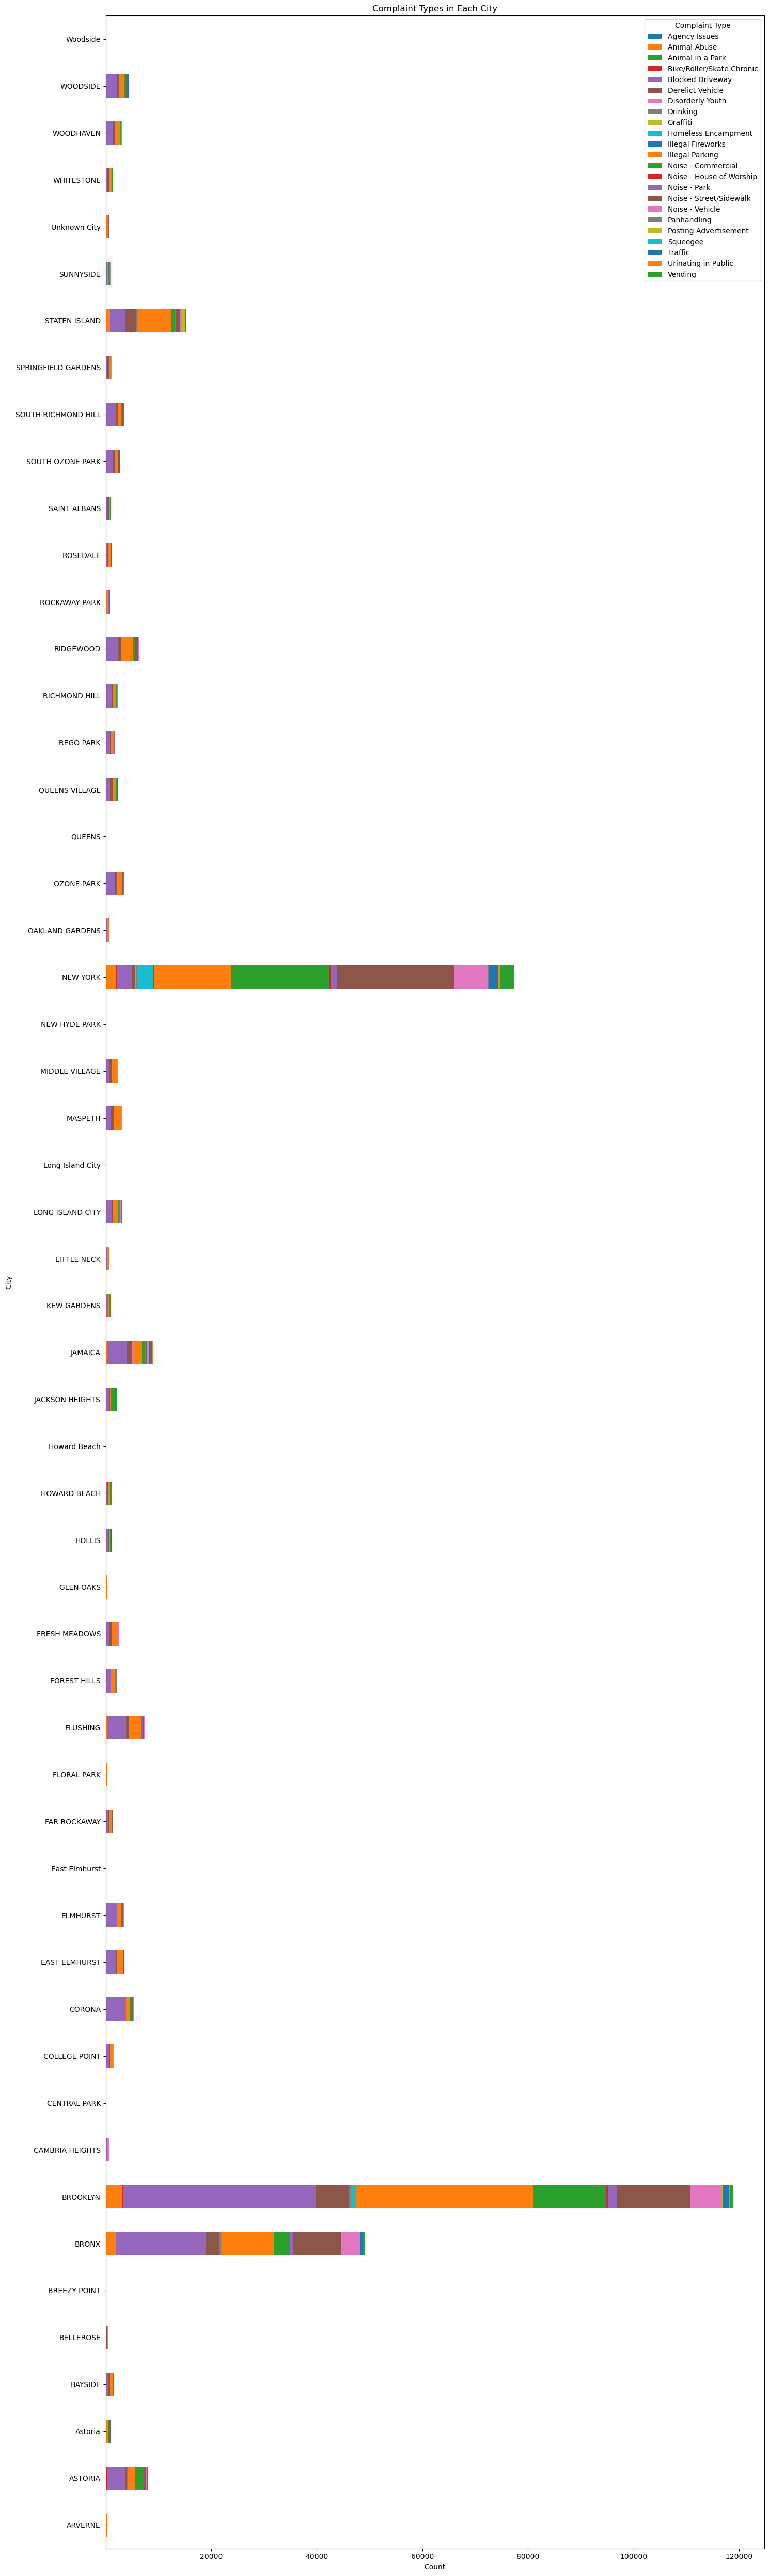

In [87]:
df_new_transposed = df_new.transpose()

df_new_transposed.plot(kind='barh', stacked=True,figsize=(15, 50))  # Use 'barh' for horizontal bar chart

plt.title('Complaint Types in Each City')
plt.xlabel('Count')
plt.ylabel('City')
plt.tight_layout()  # Adjust layout to ensure labels are visible
plt.show()



In [88]:
# Calculate average 'Request_Closing_Time' by 'Complaint Type' and 'City'
avg_closing_time = df.groupby(['Complaint Type', 'City'])['Time Elapsed'].mean()
# Sort by 'Request_Closing_Time'
avg_closing_time_sorted = avg_closing_time.sort_values(ascending=False)
avg_closing_time_sorted

Complaint Type             City               
Animal in a Park           QUEENS                 1212634.0
Graffiti                   QUEENS VILLAGE          191995.0
Homeless Encampment        BELLEROSE               140930.0
Bike/Roller/Skate Chronic  SOUTH RICHMOND HILL     111277.0
Homeless Encampment        OAKLAND GARDENS         103156.0
                                                    ...    
Urinating in Public        QUEENS                    1226.0
Illegal Fireworks          OZONE PARK                1191.0
Bike/Roller/Skate Chronic  EAST ELMHURST              908.0
Posting Advertisement      RIDGEWOOD                  895.0
Drinking                   ARVERNE                    859.0
Name: Time Elapsed, Length: 792, dtype: float64

# 5. See whether the average response time across different complaint types is similar (overall)

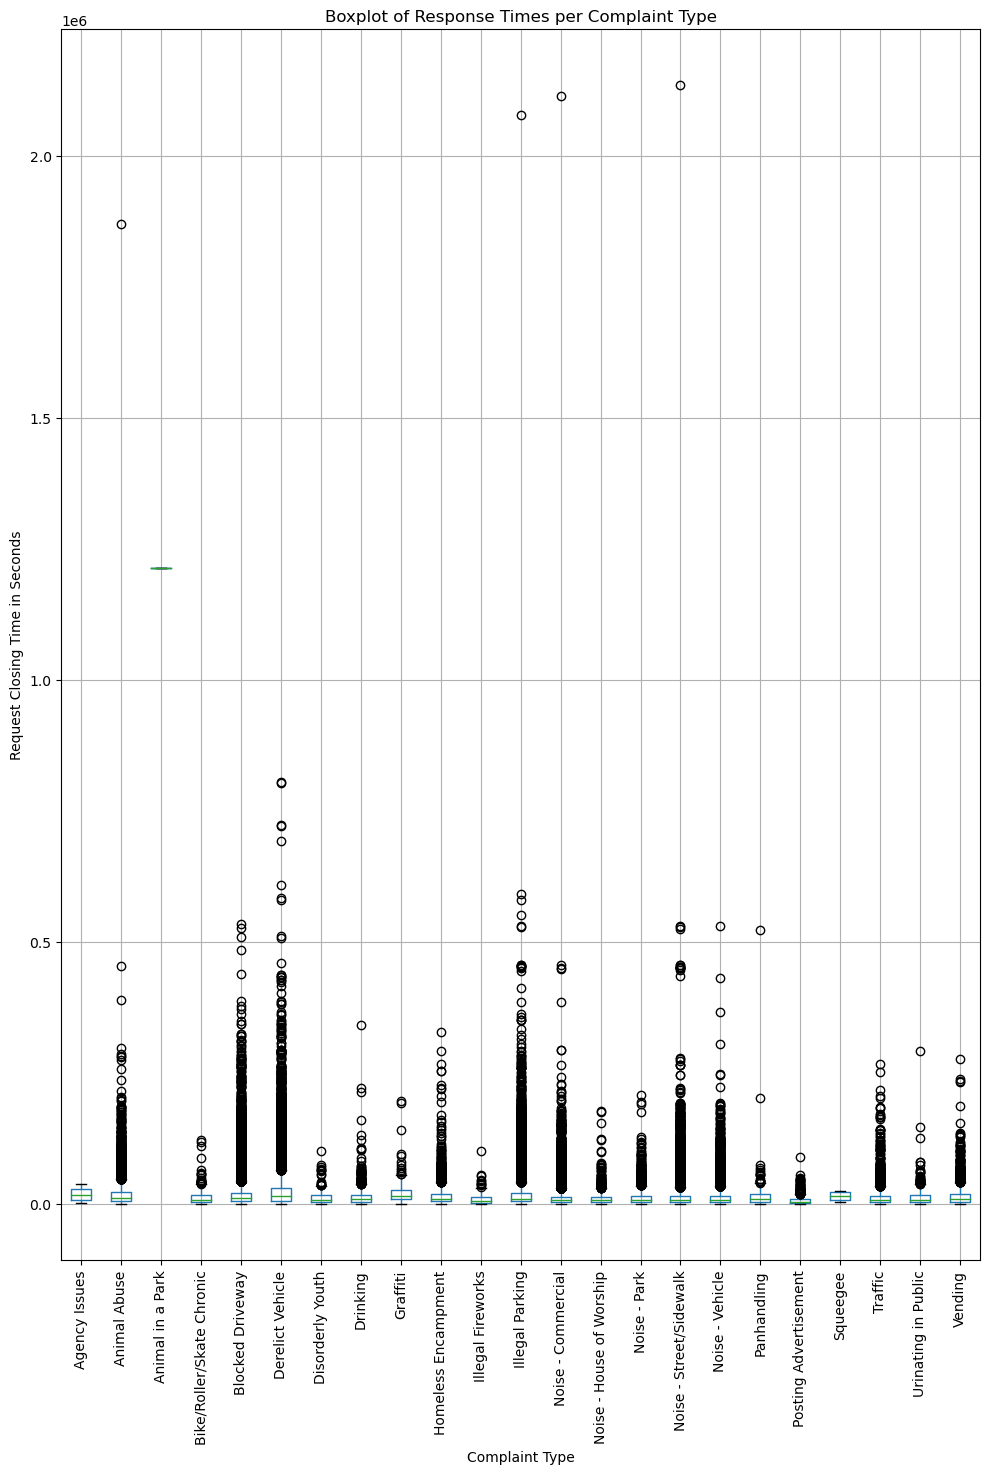

In [89]:
df.boxplot(column='Time Elapsed', by='Complaint Type', figsize=(10,15))
plt.ylabel('Request Closing Time in Seconds')
plt.title('Boxplot of Response Times per Complaint Type')
plt.suptitle('')  # Remove auto-generated title
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 6. Identify the significant variables by performing statistical analysis using p-values

In [90]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Time Elapsed
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:15,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",3330.0
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:57,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",5233.0
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:03,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",17494.0
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:13,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",27927.0
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:42,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",12464.0


# 7. Perform a Kruskal-WallisH test

In [92]:
import scipy.stats as stats

# Drop NaNs in 'Incident Zip' and 'Complaint Type'
df = df.dropna(subset=['Incident Zip', 'Complaint Type'])

# Get a list of unique 'Complaint Types'
complaint_types = df['Complaint Type'].unique()

# Create a list of arrays, each representing 'Incident Zip' for a different 'Complaint Type'
groups = [df.loc[df['Complaint Type'] == complaint_type, 'Incident Zip'] for complaint_type in complaint_types]

# Perform the Kruskal-Wallis H test
H, pval = stats.kruskal(*groups)

print("H-statistic:", H)
print("P-Value:", pval)

H-statistic: 52699.52667137966
P-Value: 0.0


In [93]:
if pval > 0.05:
    print("Fail to reject H0: All sample distributions are equal")
else:
    print("Reject H0: One or more sample distributions are not equal")

Reject H0: One or more sample distributions are not equal


# 8. Present your observations

In [ ]:
'''
Several variables contain missing values that require treatment, particularly the Intersection Street 1 and Intersection Street 2 fields.

The Bronx, New York City, and Brooklyn have the highest rates of complaints.

The most common types of complaints include illegal parking, blocked driveway, noise from commercial activities, and sidewalk and vehicle-related issues.

When it comes to specific complaint categories, such as animals in parks, graffiti, and homeless encampments, the average response time is notably longer.

The results of the Kruskal-Wallis H test indicate that at least one of the sample distributions is unequal.
'''